In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

In [7]:
#escolher aletoriamente 3 dados com lados diferentes
die = random.choice([range(1,7), range(1,9), range(1,11)])
die

range(1, 9)

In [8]:
random.choice(die)

7

In [41]:
sum(random.choice(range(10)) for i in range(10))

44

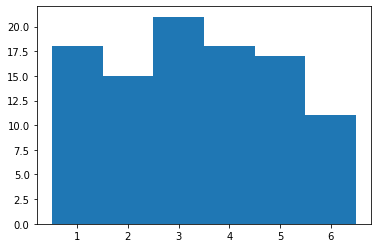

In [44]:
rolls = []
for k in range(100):
    rolls.append(random.choice([1,2,3,4,5,6]))
plt.hist(rolls, bins = np.linspace(0.5, 6.5, 7)); # use 7 because number bins


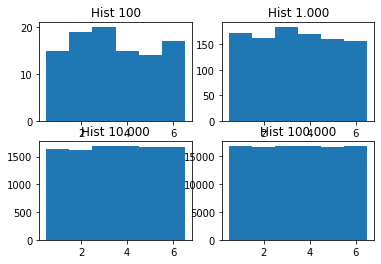

In [50]:
#se aumenta a quantiade de valores distribuidos na mesma faixa, tende a ficar igual
def gerar_hist(tam):
    rolls = []
    for k in range(tam):
        rolls.append(random.choice([1,2,3,4,5,6]))
    plt.hist(rolls, bins = np.linspace(0.5, 6.5, 7)); # use 7 because number bins

plt.subplot(221)
plt.title('Hist 100')
gerar_hist(100)
plt.subplot(222)
plt.title('Hist 1.000')
gerar_hist(1000)
plt.subplot(223)
plt.title('Hist 10.000')
gerar_hist(10000)
plt.subplot(224)
plt.title('Hist 100.000')
gerar_hist(100000)
    

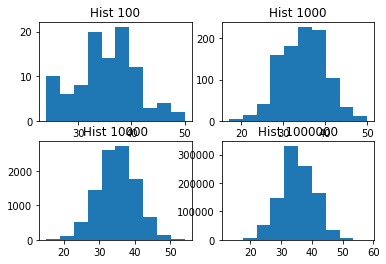

In [53]:
#agora note a diferença.. mas ainda em python (ja é mais rapido)
def gerar_hist(tam):
    ys = []
    for rep in range(tam):
        y = 0
        for k in range(10):
            x = random.choice([1,2,3,4,5,6])
            y = y + x
        ys.append(y)
    plt.title('Hist ' + str(tam))
    plt.hist(ys)

plt.subplot(221)
gerar_hist(100)
plt.subplot(222)
gerar_hist(1000)
plt.subplot(223)
gerar_hist(10000)
plt.subplot(224)
gerar_hist(1000000)

In [85]:
#Usando RANDOM com NUMPY fica bem mais rápido que o exemplo acima
print( np.random.random() )
print( np.random.random(5) )
print( np.random.random((5,3)) )
print( np.random.random((5,2,3)) )

0.018831710902452947
[0.38537972 0.49644812 0.28561166 0.76533453 0.55848625]
[[0.2841271  0.33132973 0.58968796]
 [0.22075441 0.58430358 0.78380953]
 [0.93874736 0.64963618 0.65745896]
 [0.40797648 0.52072106 0.69734292]
 [0.95884666 0.57337111 0.00790596]]
[[[0.35130868 0.58600842 0.14508575]
  [0.11683343 0.55837975 0.74656935]]

 [[0.24616618 0.90847252 0.7073089 ]
  [0.95124493 0.91999316 0.47988268]]

 [[0.83154255 0.77168624 0.68885198]
  [0.7202764  0.62098321 0.34676099]]

 [[0.80200807 0.17621058 0.48848314]
  [0.98008389 0.08426724 0.81014425]]

 [[0.54422193 0.46220411 0.11992638]
  [0.69190577 0.38654878 0.69956428]]]


In [77]:
#normal distribuition
print( np.random.normal(0, 1, 5) )
print( np.random.normal(0, 1, 5) )
print( np.random.normal(0, 1, (5,3)) )

[ 0.0648846  -0.15203319  0.61111249  1.09107526  0.46645546]
[-1.02351887 -0.8243556  -1.20981083  0.64402031 -0.42914584]
[[ 0.12914137 -0.9355376  -2.10061258]
 [ 0.79336923  0.4021533   0.58979919]
 [ 0.45752665  2.17822835 -0.57890411]
 [ 0.87214883  0.47933248  0.42446316]
 [-0.72559537 -0.00482856  0.1953793 ]]


(array([  5.,  19.,  74., 198., 241., 271., 131.,  43.,  16.,   2.]),
 array([294. , 305.6, 317.2, 328.8, 340.4, 352. , 363.6, 375.2, 386.8,
        398.4, 410. ]),
 <a list of 10 Patch objects>)

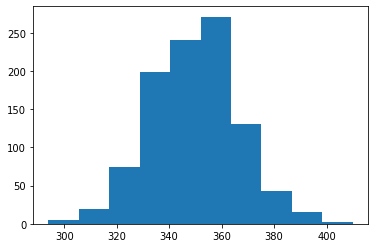

In [80]:
X = np.random.randint(1, 7, (1000,100)) #primeiro e segundo parametros indicam os valores min e max
Y = np.sum(X, axis=1) # somar por colunas
plt.hist(Y)

In [83]:
np.sum(np.random.randint(1,7,(100,10)), axis=0)

array([369, 357, 373, 379, 328, 328, 323, 359, 357, 355])

In [95]:
#verificando tempos de execução 
#usando TIME CLOCK

#EXEMPLO COM PYTHON (sem numpy)
start_time = time.perf_counter()
ys = []
for rep in range(1000000):
    y = 0
    for k in range(10):
        x = random.choice([1,2,3,4,5,6])
        y = y + x
    ys.append(y)
end_time = time.perf_counter()

print(start_time)
print(end_time)
tempo_py = end_time - start_time
print(tempo_py)

331082.3410146
331097.3433424
15.002327799971681


In [96]:
#EXEMPLO COM NUMPY
start_time = time.perf_counter()
X = np.random.randint(1, 7, (1000000,10)) #primeiro e segundo parametros indicam os valores min e max
Y = np.sum(X, axis=1) # somar por colunas
end_time = time.perf_counter()

print(start_time)
print(end_time)
tempo_np = end_time - start_time
print(tempo_np)

331100.1198935
331100.287836
0.16794249997474253


In [98]:
#quantidade de vezes mais rapido o NUMPY
tempo_py / tempo_np 

89.33014455678541

[[-0.67010353  2.2189226  -2.34906126 -0.14085141 -0.93654455]
 [ 0.53800844  1.84604059  0.76083939 -0.50797348 -0.68231727]] 

 [[ 0.         -0.67010353  1.54881907 -0.80024219 -0.9410936  -1.87763815]
 [ 0.          0.53800844  2.38404903  3.14488841  2.63691494  1.95459766]]


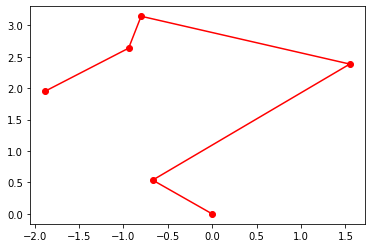

In [10]:
#RANDOM WALKS
X_0 = np.array([[0],[0]]) #inicio
delta_X = np.random.normal(0, 1, (2,5))
X = np.cumsum(delta_X, axis = 1) #cada valor da lista é somado ao próximo valor, acumulando
X = np.concatenate((X_0, X), axis=1)
print(delta_X, '\n\n', X)
plt.plot(X[0], X[1], 'ro-')

In [12]:
help(np.concatenate)

Help on built-in function concatenate in module numpy:

concatenate(...)
    concatenate((a1, a2, ...), axis=0, out=None)
    
    Join a sequence of arrays along an existing axis.
    
    Parameters
    ----------
    a1, a2, ... : sequence of array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int, optional
        The axis along which the arrays will be joined.  If axis is None,
        arrays are flattened before use.  Default is 0.
    out : ndarray, optional
        If provided, the destination to place the result. The shape must be
        correct, matching that of what concatenate would have returned if no
        out argument were specified.
    
    Returns
    -------
    res : ndarray
        The concatenated array.
    
    See Also
    --------
    ma.concatenate : Concatenate function that preserves input masks.
    array_split : Split an array into multiple sub-arrays of equ